## DATA PROPROCESSING

In [72]:
import pandas as pd

## Charement du training data

In [73]:
data = pd.read_csv("data/^GSPC(1).csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000
1,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000
2,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000
3,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000
4,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2515 non-null   object 
 1   Open       2515 non-null   float64
 2   High       2515 non-null   float64
 3   Low        2515 non-null   float64
 4   Close      2515 non-null   float64
 5   Adj Close  2515 non-null   float64
 6   Volume     2515 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


## Composition 

In [75]:
data["Date"] = pd.to_datetime(data["Date"])

In [76]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000
1,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000
2,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000
3,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000
4,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000
...,...,...,...,...,...,...,...
2510,2010-12-27,1254.660034,1258.430054,1251.479980,1257.540039,1257.540039,1992470000
2511,2010-12-28,1259.099976,1259.900024,1256.219971,1258.510010,1258.510010,2478450000
2512,2010-12-29,1258.780029,1262.599976,1258.780029,1259.780029,1259.780029,2214380000
2513,2010-12-30,1259.439941,1261.089966,1256.319946,1257.880005,1257.880005,1970720000


In [77]:
data["Date"].dt.year.value_counts()

2008    253
2002    252
2003    252
2004    252
2005    252
2009    252
2010    252
2006    251
2007    251
2001    248
Name: Date, dtype: int64

## Checking for missing value

In [78]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Il n'y a pas de données manquantes sur les données d'entrainement

## Chargement pour le testing data

In [79]:
data_bis = pd.read_csv("data/^GSPC_2011.csv")
data_bis.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000
1,2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000
2,2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000
3,2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000
4,2011-01-07,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,4963110000


In [80]:
data_bis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [81]:
data_bis.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Il n'y a pas de données manquantes sur l'échantillon de  test.

In [82]:
data_bis["Date"] = pd.to_datetime(data_bis["Date"])

In [83]:
data_bis["Date"].dt.year.value_counts()

2011    252
Name: Date, dtype: int64

In [84]:
data[~(data["Close"] == data["Adj Close"])]

,Date,Open,High,Low,Close,Adj Close,Volume


In [85]:
data_bis[~(data_bis["Close"] == data_bis["Adj Close"])]

,Date,Open,High,Low,Close,Adj Close,Volume


La variable "Close" est identique à la variable Adj Close, on peut supprimer l'une d'entre elle


In [86]:
data.drop(columns=["Adj Close"], inplace=True)

In [87]:
data_bis.drop(columns=["Adj Close"], inplace=True)

In [88]:
data

,Date,Open,High,Low,Close,Volume
0,2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1129400000
1,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1880700000
2,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,2131000000
3,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1430800000
4,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1115500000
...,...,...,...,...,...,...
2510,2010-12-27,1254.660034,1258.430054,1251.479980,1257.540039,1992470000
2511,2010-12-28,1259.099976,1259.900024,1256.219971,1258.510010,2478450000
2512,2010-12-29,1258.780029,1262.599976,1258.780029,1259.780029,2214380000
2513,2010-12-30,1259.439941,1261.089966,1256.319946,1257.880005,1970720000


## VISUALIZATION

In [91]:
import matplotlib.pyplot as plt

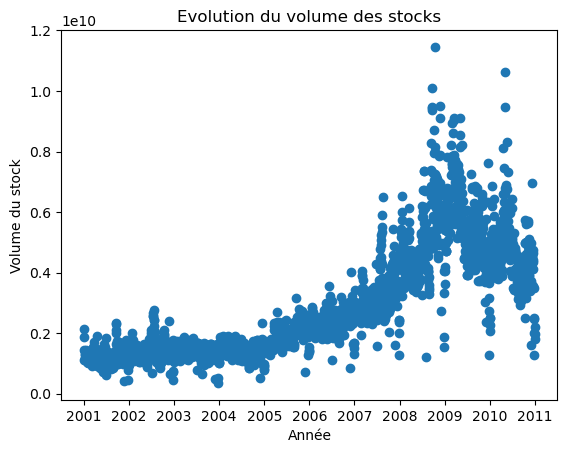

In [149]:
plt.scatter(x = data["Date"], y = data["Volume"])
plt.xlabel("Année")
plt.ylabel("Volume du stock")
plt.title("Evolution du volume des stocks")
plt.show()

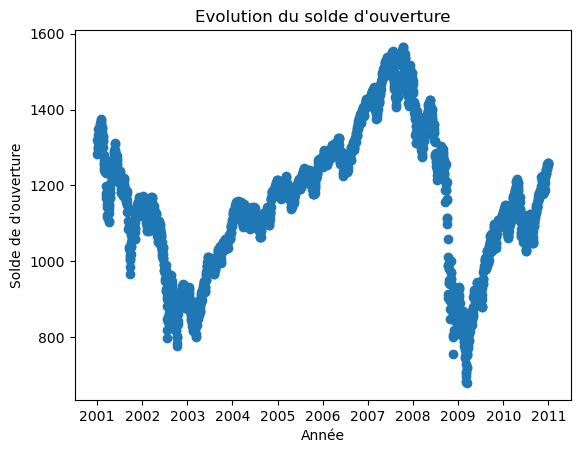

In [147]:
plt.scatter(x = data["Date"], y = data["Open"])
plt.title(label = "Evolution du solde d'ouverture")
plt.xlabel("Année")
plt.ylabel("Solde de d'ouverture")
plt.show()

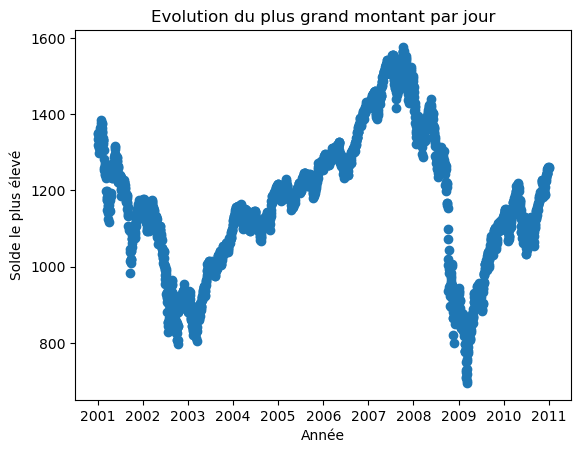

In [146]:
plt.scatter(x = data["Date"], y = data["High"])
plt.title(label = "Evolution du plus grand montant par jour")
plt.xlabel("Année")
plt.ylabel("Solde le plus élevé")
plt.show()

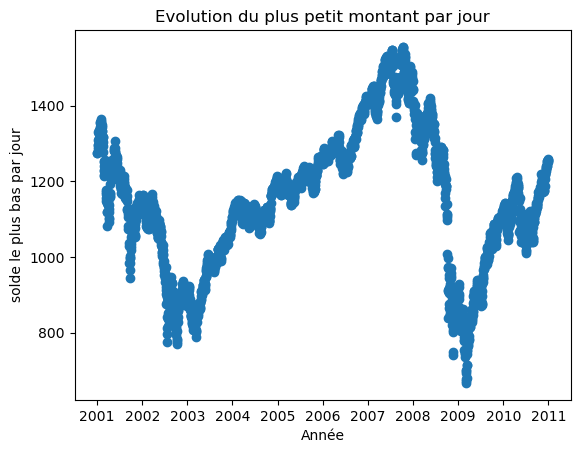

In [145]:
plt.scatter(x = data["Date"], y = data["Low"])
plt.title(label = "Evolution du plus petit montant par jour")
plt.xlabel("Année")
plt.ylabel("solde le plus bas par jour")
plt.show()

In [128]:
import numpy as np

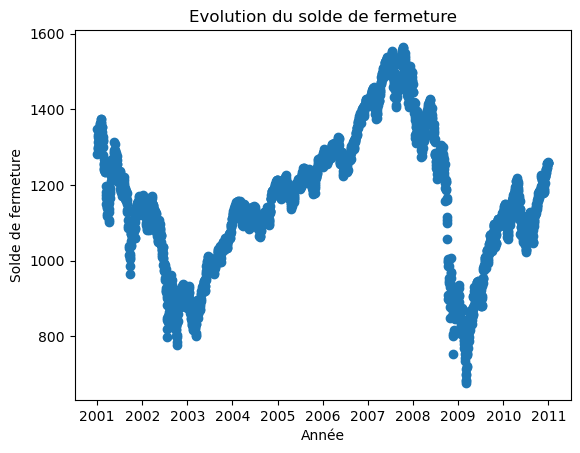

In [144]:
plt.scatter(x = data["Date"], y =  data["Close"])
plt.title(label = "Evolution du solde de fermeture")
plt.xlabel("Année")
plt.ylabel("Solde de fermeture")
plt.show()

Nous constations que les fluctuations sont relativement petites par rapport à l'ordre de grandeur des variables. C'est pourquoi les graphiques sont similaire et ça donne l'impression que ce sont les mêmes montants.

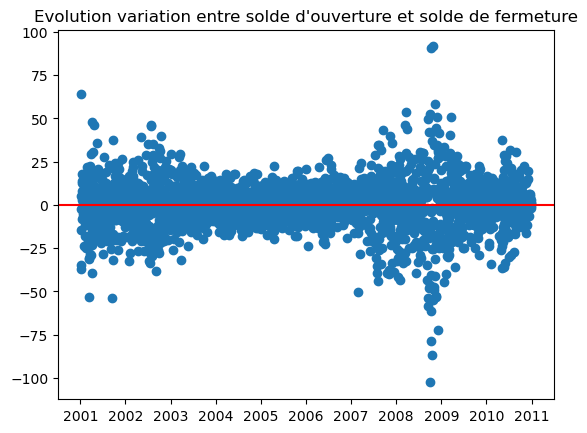

In [140]:
plt.scatter(x = data["Date"], y =  data["Close"] - data["Open"])
plt.title(label = "Evolution variation entre solde d'ouverture et solde de fermeture")
plt.axhline(y = 0, color = "r")
plt.show()

## Enregistrement des données

In [150]:
data.to_csv("cleaned_data/Training.csv")

In [151]:
data_bis.to_csv("cleaned_data/test.csv")